# Solucion Tarea metodos computacionales
## Santiago Andres Orjuela
### 1006508118







# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
from scipy.interpolate import lagrange

In [14]:
#Posicion en x
def pos_x(t, theta, v0, u, alpha, g, b):  
  T1 =  (u * np.cos(alpha))*t
  T2 =  (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))
  T3 =  1-np.exp(-b*t)
  x = T1 + T2 * T3   
  return x

#Posicion en y
def pos_y(t,theta,v0, u, alpha, g, b):  
  T1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
  T2 =  1-np.exp(-b * t)
  T3 =  (g/b - u * np.sin(alpha))*t
  y = T1*T2 - T3 
  return y 

In [15]:
# Incializzacion de parametros
v0 = 50 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8 #Aceleracion de la gravedad m/s2


In [16]:
params = theta, v0 , u, alpha,  g, b
t = np.linspace(0, 20, 1000)

x = pos_x(t, *params)
y = pos_y(t, *params)

df = pd.DataFrame({"X":x, "Y":y,"T":t})
df

,X,Y,T
0,0.000000,0.000000,0.00000
1,0.707210,0.705497,0.02002
2,1.413212,1.406363,0.04004
3,2.118006,2.102601,0.06006
4,2.821595,2.794217,0.08008
...,...,...,...
995,263.257394,-986.244329,19.91992
996,263.202967,-988.458351,19.93994
997,263.148095,-990.674084,19.95996
998,263.092777,-992.891526,19.97998


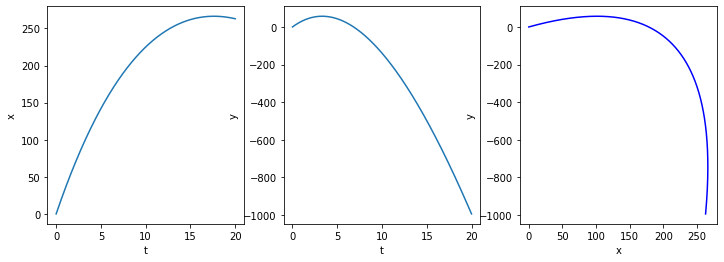

In [17]:
plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(df['T'], df['X'])
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(132)
plt.plot(df['T'], df['Y'])
plt.xlabel("t")
plt.ylabel("y")

plt.subplot(133)
plt.plot(df['X'], df['Y'],"b-")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

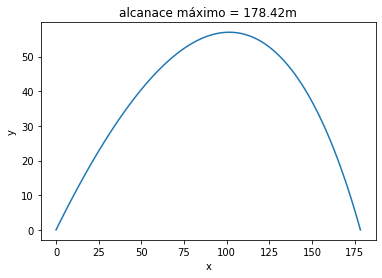

In [18]:
#Alcance maximo
tiempo = optimize.newton(pos_y, 10, args=(params))
alcance = pos_x(tiempo, *params)
tv = np.linspace(0, tiempo, 100)
plt.plot(pos_x(tv, *params),pos_y(tv, *params))
plt.title(f"alcanace máximo = {alcance:.2f}m")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
theta_ = np.linspace(10,90,17)
theta_

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.])

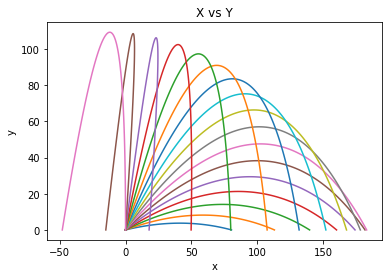

In [20]:
theta_ = np.linspace(10,90,17)
theta = np.deg2rad(theta_)

R = np.zeros(len(theta))
tv = np.zeros(len(theta))

for i,t in enumerate(theta):
  params = t, v0 , u, alpha,  g, b
  
  tiempo = optimize.newton(pos_y, 10, args=(params))
  tv[i] = tiempo
  R[i] = pos_x(tiempo,*params)

  t = np.linspace(0,tiempo,100)  
  plt.plot(pos_x(t, *params), pos_y(t, *params))
  plt.title('X vs Y')
  plt.xlabel("x")
  plt.ylabel("y")

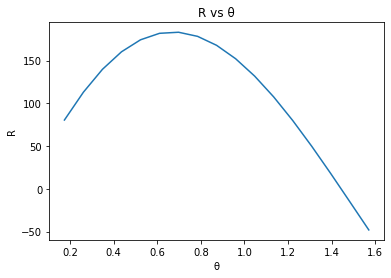

In [21]:
plt.plot(theta,R)
plt.title('R vs θ')
plt.xlabel('θ')
plt.ylabel('R')
plt.show()

In [67]:
def Polynomial_to_LaTeX(p):
    """ Small function to print nicely the polynomial p as we write it in maths, in LaTeX code."""
    coefs = p.coef[::-1]  # List of coefficient, sorted by increasing degrees
    res = ""  # The resulting string
    for i, a in enumerate(coefs):
        if int(a) == a:  # Remove the trailing .0
            a = int(a)
        if i == 0:  # First coefficient, no need for X
            if a > 0:
                res += "{a} + ".format(a=a)
            elif a < 0:  # Negative a is printed like (a)
                res += "({a}) + ".format(a=a)
            # a = 0 is not displayed 
        elif i == 1:  # Second coefficient, only X and not X**i
            if a == 1:  # a = 1 does not need to be displayed
                res += "x + "
            elif a > 0:
                res += "{a} \;x + ".format(a=a)
            elif a < 0:
                res += "({a}) \;x + ".format(a=a)
        else:
            if a == 1:
                # A special care needs to be addressed to put the exponent in {..} in LaTeX
                res += "x^{i} + ".format(i="{%d}" % i)
            elif a > 0:
                res += "{a} \;x^{i} + ".format(a=a, i="{%d}" % i)
            elif a < 0:
                res += "({a}) \;x^{i} + ".format(a=a, i="{%d}" % i)
    return "$" + res[:-3] + "$" if res else ""  

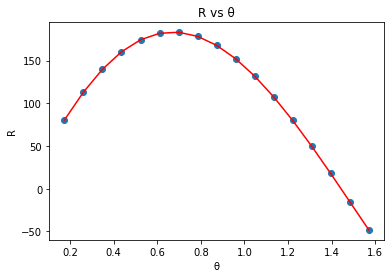

<IPython.core.display.Latex object>

In [68]:
from IPython.core.display import Latex

coeffs = lagrange(theta,R)
p = np.poly1d(coeffs)


plt.title('R vs θ')
plt.plot(theta, R,"o")
plt.plot(theta, p(theta),"r-", label = p)
plt.xlabel("θ")
plt.ylabel("R")
plt.show()

Latex(Polynomial_to_LaTeX(p))






# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


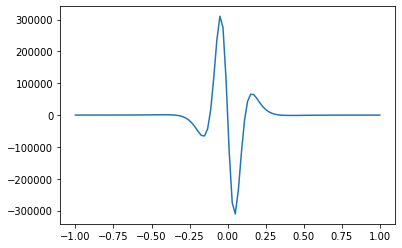

In [24]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [25]:
def f(x):
  return 1/(1+25*(x**2))

In [47]:
def p(n):
  Y= []
  X= np.linspace(-1,1,n)

  for i in X:
    Y.append(f(i))

  P = lagrange(X,Y)

  x=np.linspace(-3,3,100) 

  plt.plot(x,P(x), 'r-', label='Polinomio')  
  plt.plot(X,f(X),'o',color='black', label='puntos')
  plt.xlabel('x', fontsize=13)
  plt.ylabel('P(x)', fontsize=13)
  plt.title(f'Polinomio de ajuste para {n} puntos', fontsize=14)
  plt.legend()
  plt.grid()

  return plt.show() 

           3          2
1.735e-17 x - 0.2545 x - 6.072e-18 x + 0.293


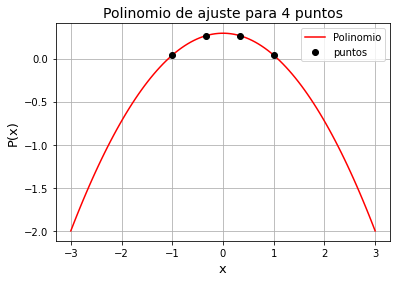

           7         6             5         4             3         2
-1.32e-14 x - 5.174 x + 4.229e-14 x + 9.076 x + 7.166e-15 x - 4.617 x + 3.161e-16 x + 0.7526


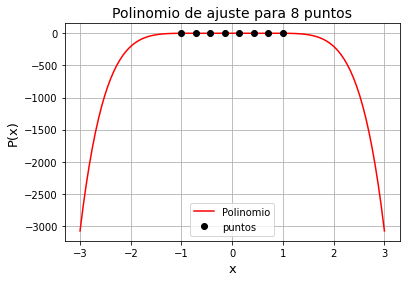

            11        10             9         8             7
-1.464e-13 x  - 89.5 x  + 1.527e-12 x + 215.1 x - 7.305e-12 x
          6             5         4             3         2
 - 184.3 x - 2.488e-12 x + 69.76 x - 2.039e-14 x - 11.96 x - 2.438e-15 x + 0.923


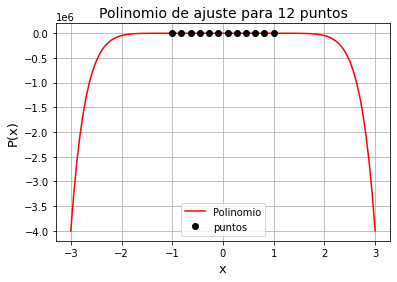

           15        14             13        12             11
1.276e-12 x  - 1519 x  - 3.981e-10 x  + 4651 x  - 1.342e-10 x 
         10             9        8            7        6             5
 - 5570 x  + 5.346e-10 x + 3348 x + 1.49e-10 x - 1083 x + 1.625e-11 x
          4             3         2
 + 190.1 x + 1.167e-13 x - 17.98 x - 1.233e-15 x + 0.9762


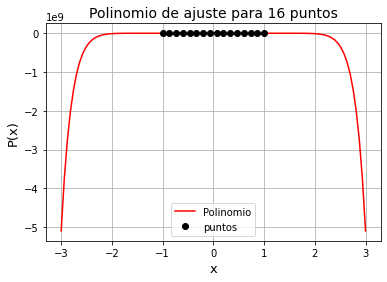

            19             18             17            16
-2.382e-10 x  - 2.567e+04 x  + 1.904e-08 x  + 9.56e+04 x 
              15             14             13            12
 - 1.645e-08 x  - 1.468e+05 x  + 5.449e-08 x  + 1.21e+05 x 
              11             10             9             8
 + 5.376e-08 x  - 5.858e+04 x  + 2.785e-08 x + 1.717e+04 x
              7        6             5         4             3
 + 2.783e-09 x - 3055 x + 9.253e-11 x + 327.7 x + 8.506e-13 x
          2
 - 21.62 x + 7.005e-15 x + 0.9927


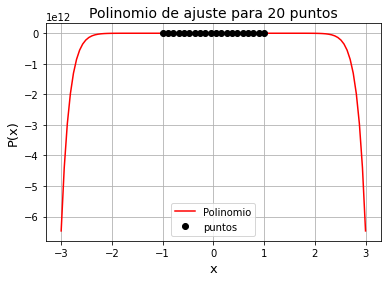

In [48]:
for i in range(1,6):
  i = 4*i
  p(i)

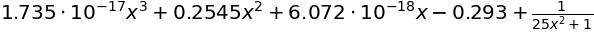

In [30]:
#Cota del Error
x = sp.symbols('x')
e=(1/(1+25*x**2))-(-1.735e-17*x**3 - 0.2545*x**2 - 6.072e-18*x + 0.293)
e

In [31]:
e=(1/(1+25*0.5**2))-(-1.735e-17*0.5**3 - 0.2545*0.5**2 - 6.072e-18*0.5 + 0.293)
e

Gráfica del error para 4 puntos con el polinomio de Lagrange


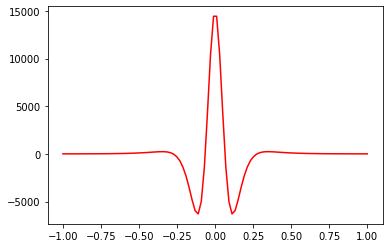

In [32]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() 

x = sp.symbols("x") 
print('Gráfica del error para 4 puntos con el polinomio de Lagrange')
f5 = sp.diff(f_s(x),x, 4)
fxn5 = sp.lambdify(x,f5,'numpy') 

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_),'r')
plt.show()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [33]:
from numpy.polynomial.hermite import hermfit

In [45]:
def ph(n):
  Y= []
  X= np.linspace(-1,1,n)

  for i in X:
    Y.append(f(i))

  coeffs = np.polynomial.hermite.hermfit(X, Y, deg=n-1)
  PH = np.poly1d(coeffs)

  x=np.linspace(-3,3,100) 

  plt.plot(x,PH(x), 'r-', label='Polinomio de Hermite')  
  plt.plot(X,f(X),'o',color='black', label='puntos')
  plt.xlabel('x', fontsize=13)
  plt.ylabel('PH(x)', fontsize=13)
  plt.title(f'Polinomio de Hermite para {n} puntos', fontsize=14)
  plt.legend()
  plt.grid()
  print(PH)
  return plt.show() 

        3            2
0.1657 x - 9.31e-18 x - 0.06363 x - 1.102e-18


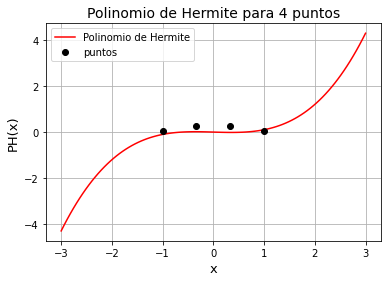

        7             6         5             4         3            2
-4.449 x + 1.804e-12 x - 8.898 x + 1.067e-12 x - 1.858 x + 1.27e-13 x - 0.08084 x + 3.62e-15


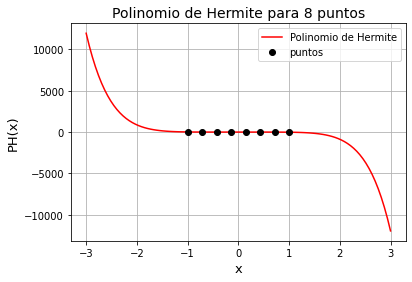

       11             10        9             8        7             6
-1530 x  - 1.081e-07 x  - 4253 x - 1.047e-07 x - 1579 x - 2.434e-08 x
          5             4         3             2
 - 176.1 x - 2.019e-09 x - 7.026 x - 6.512e-11 x - 0.0874 x - 6.868e-13


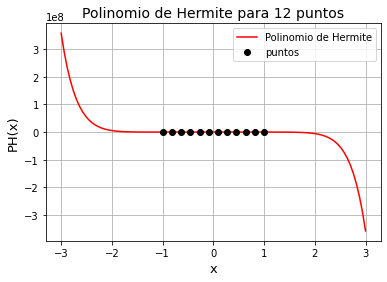

            15         14             13         12             11
-9.925e+05 x  - 11.82 x  - 3.716e+06 x  - 14.59 x  - 1.988e+06 x 
          10             9          8             7           6
 - 4.635 x  - 3.548e+05 x - 0.5841 x - 2.714e+04 x - 0.03436 x
          5             4         3             2
 - 969.1 x - 0.0009924 x - 15.74 x - 1.347e-05 x - 0.0927 x - 6.796e-08


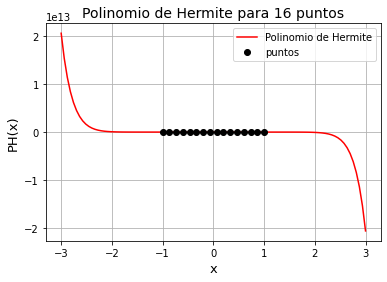

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


            19             18             17             16
-1.109e+09 x  - 6.151e+06 x  - 5.239e+09 x  - 9.624e+06 x 
              15             14             13             12
 - 3.668e+09 x  - 4.016e+06 x  - 8.991e+08 x  - 6.982e+05 x 
              11            10             9        8             7
 - 1.012e+08 x  - 6.07e+04 x  - 5.907e+06 x - 2879 x - 1.881e+05 x
          6        5         4         3            2
 - 77.01 x - 3258 x - 1.148 x - 28.53 x - 0.008808 x - 0.09802 x - 2.688e-05


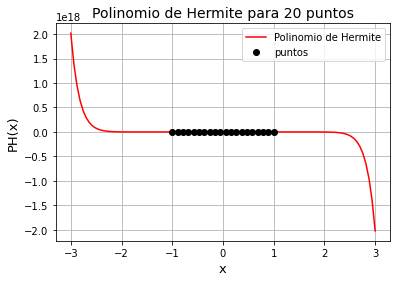

In [46]:
for i in range(1,6):
  i = 4*i
  ph(i)

     8             7         6             5         4             3
200 x - 6.957e-11 x + 458.2 x - 4.105e-11 x + 131.8 x - 4.863e-12 x
          2
 + 10.14 x - 1.377e-13 x + 0.2097


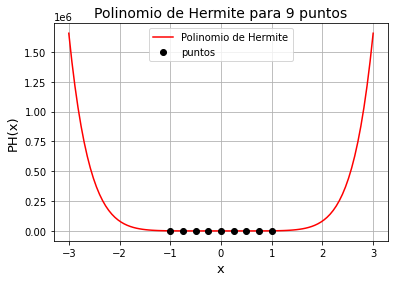

In [49]:
#Cota de error 
ph(9)

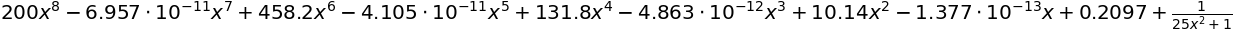

In [51]:
x = sp.symbols('x')
eH=(1/(1+25*x**2))+200*x**8-6.957e-11*x**7+458.2*x**6- 4.105e-11*x**5+ 131.8*x**4- 4.863e-12*x**3+ 10.14*x**2 - 1.377e-13*x + 0.2097
eH

In [52]:
eH=(1/(1+25*0.5**2))-(+200*0.5**8-6.957e-11*0.5**7+458.2*0.5**6- 4.105e-11*0.5**5+ 131.8*0.5**4- 4.863e-12*0.5**3+ 10.14*0.5**2 - 1.377e-13*0.5 + 0.2097)
eH

Gráfica del error para 4 puntos con el polinomio de Hermite


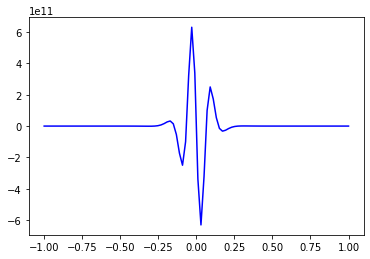

In [53]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() 

x = sp.symbols("x") 

print('Gráfica del error para 4 puntos con el polinomio de Hermite')
f5 = sp.diff(f_s(x),x, 9)
fxn5 = sp.lambdify(x,f5,'numpy')

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_), color='b' )
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [54]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

In [59]:
im = plt.imread('paloma.png')

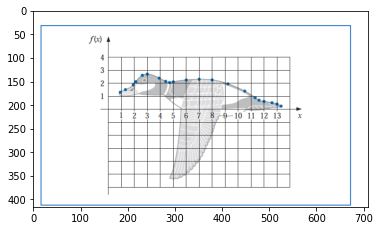

In [82]:
plt.imshow(im)

In [84]:
df= pd.read_excel('paloma.xlsx')
df

,x,y
0,184.0,173.0
1,195.0,167.0
2,212.0,158.0
3,217.0,150.0
4,231.0,138.0
5,241.0,135.0
6,266.0,143.0
7,280.0,150.0
8,288.0,152.0
9,296.0,151.0


In [85]:
P = lagrange(df.x, df.y)
Latex(Polynomial_to_LaTeX(p))

<IPython.core.display.Latex object>

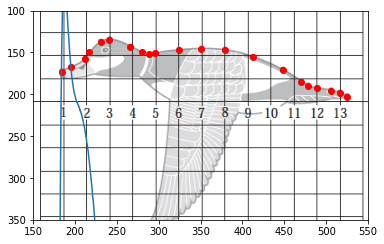

In [86]:

plt.imshow(im)
plt.plot(df.x,df.y,'ro')
x=np.linspace(150,550,1000)
plt.plot(x,P(x))
plt.xlim(150,550)
plt.ylim(350,100)
plt.show()

In [87]:
p=CubicSpline(df.x,df.y)

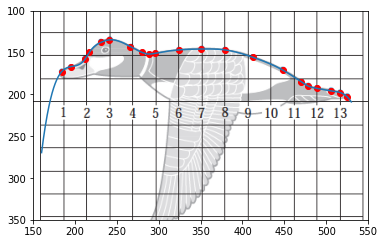

In [90]:
plt.imshow(im)
plt.plot(df.x,df.y,'ro')
x=np.linspace(160,530,1000)
plt.plot(x,p(x) )
plt.xlim(150,550)
plt.ylim(350,100)
plt.show()